In [1]:
import qiskit

Task 1

i. 
- Initial state : q0 = x =  |0⟩, q1 = y =  |0⟩,  q2 = z = |0⟩ and q3 =  |1⟩. <br>
- We apply H^(⊗3) to create an equal superposition. <br>
- For evaluation of function f as a black box :  <br>
1. We apply not gate on q2. 
2. Then cnot gates on (q0,q3), (q1,q3), (q2,q3). 
3. Again apply not gate to get back q2.<br>
This oracle will give q0, q1, q2, and q0⊕q1⊕q2'⊕q3 as outputs.<br>
- We will apply H^(⊗3). <br>
- If all measurement results are 000, then it's a constant function, or if at least one measurement result is not 000, then it's a balanced function. From the results obtained after measurement, f is balanced as all the measurement results are not 000.

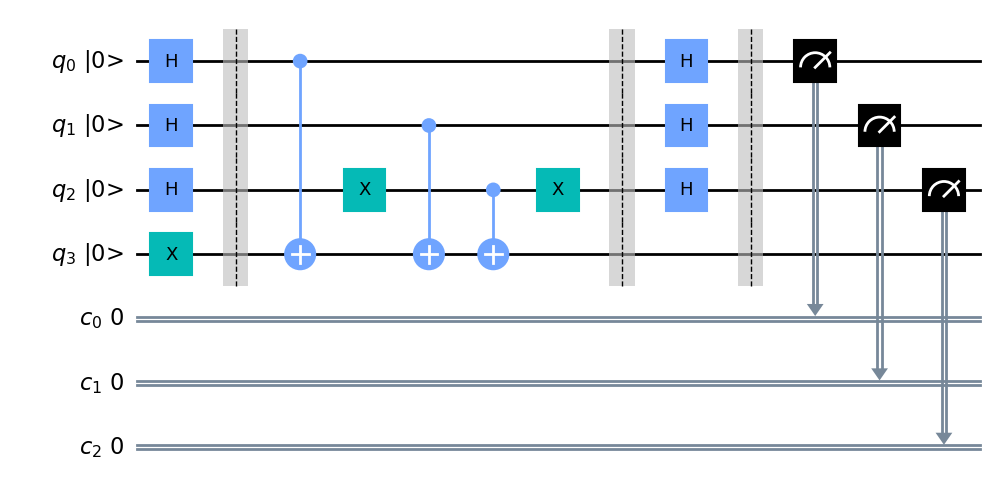

In [2]:
from qiskit import QuantumCircuit, Aer, QuantumRegister, execute, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a circuit with 4 quantum registers and 3 classical registers
circ = QuantumCircuit(4,3)

# Apply H^(⊗3) to create an equal superposition
circ.h(0)   
circ.h(1) 
circ.h(2) 
circ.x(3) 
circ.barrier()

# Evaluation of f
circ.cx(0,3)
circ.cx(1,3)
circ.x(2)
circ.cx(2,3)
circ.x(2)
circ.barrier()

# Apply H^(⊗3) 
circ.h(0)   
circ.h(1) 
circ.h(2) 
circ.barrier()

# Measurement
circ.measure(0,0)
circ.measure(1,1)
circ.measure(2,2)

# Draw the circuit
circ.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

ii.

/var/folders/jm/jj3jlz1j63v1qh6z_xp8840h0000gn/T/ipykernel_93043/1261932414.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')
/var/folders/jm/jj3jlz1j63v1qh6z_xp8840h0000gn/T/ipykernel_93043/1261932414.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circ, simulator, shots=1000)


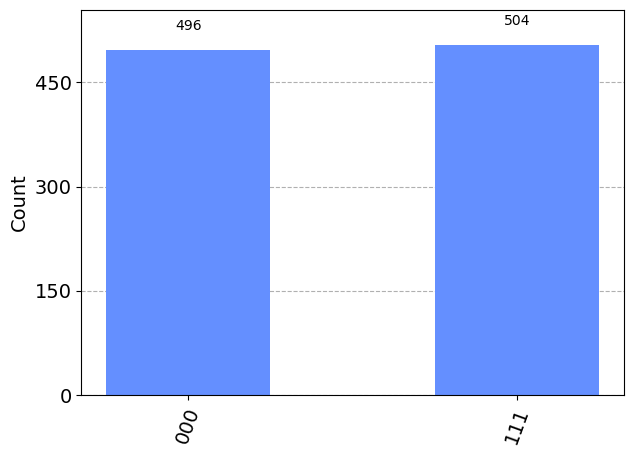

In [3]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circ)

# Plot the results
plot_histogram(counts)

Task 2

i.

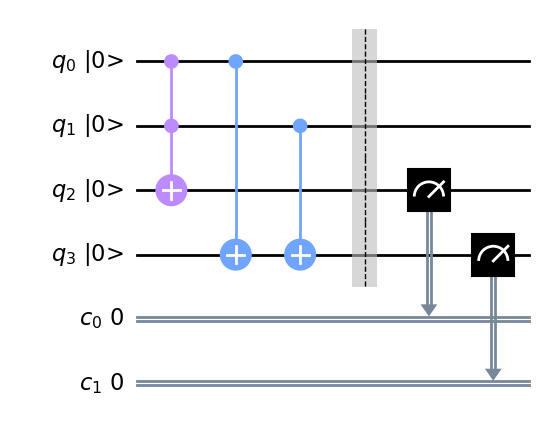

In [4]:
# Create a circuit with 4 quantum registers and 2 classical registers, q0 = x and q1 = y
qc0 = QuantumCircuit(4,2)

# Tofolli gate used as AND gate and CNOT gate as XOR gate
qc0.ccx(0, 1, 2)
qc0.cx(0, 3)
qc0.cx(1, 3)
qc0.barrier()

# Measurement, q2 gives x ∧ y and q3 gives x ⊕ y 
qc0.measure(2,0)
qc0.measure(3,1)

# Draw the circuit
qc0.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

/var/folders/jm/jj3jlz1j63v1qh6z_xp8840h0000gn/T/ipykernel_93043/2365722232.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc0, simulator, shots=1000)


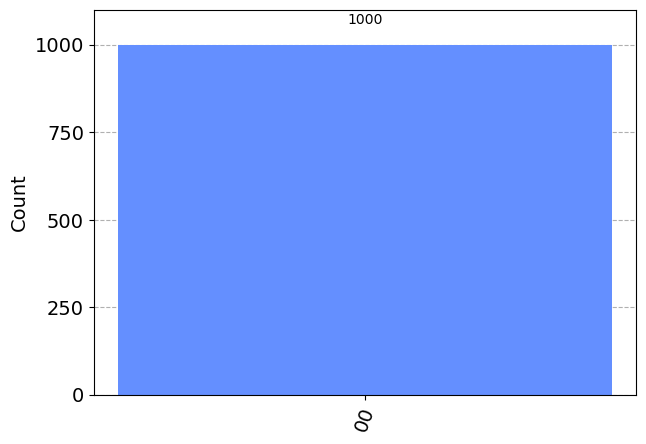

In [5]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc0, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc0)

# Plot the results
plot_histogram(counts)

ii.

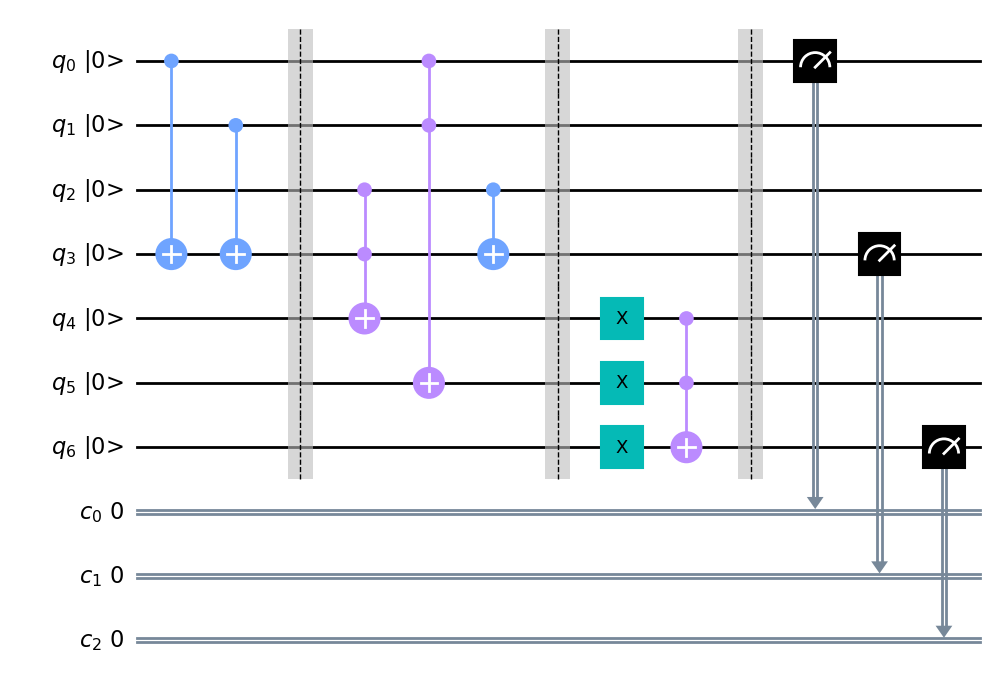

In [6]:
# Create a circuit with 7 quantum registers and 3 classical registers, q0 = x, q1 = y and q2 = z
qc1 = QuantumCircuit(7,3)

# Tofolli gate used as AND/NAND gate and CNOT gate as XOR gate
qc1.cx(0, 3)
qc1.cx(1, 3)
qc1.barrier()
qc1.ccx(2, 3, 4)
qc1.cx(2, 3)
qc1.ccx(0, 1, 5)
qc1.barrier()
qc1.x(4)
qc1.x(5)
qc1.x(6)
qc1.ccx(4, 5, 6)
qc1.barrier()

# Measurement, q0 gives x, q3 gives x ⊕ y ⊕ z and q6 gives ((x ⊕ y) ∧ z) ∨ (x ∧ y)
qc1.measure(0,0)
qc1.measure(3,1)
qc1.measure(6,2)

# Draw the circuit
qc1.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

/var/folders/jm/jj3jlz1j63v1qh6z_xp8840h0000gn/T/ipykernel_93043/4071863030.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc1, simulator, shots=1000)


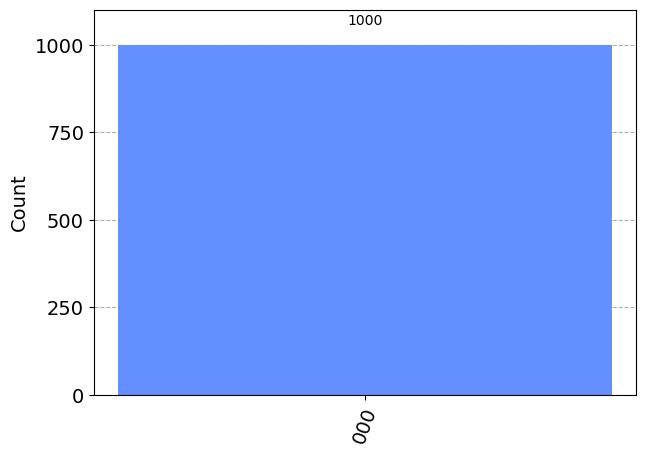

In [7]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc1, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc1)

# Plot the results
plot_histogram(counts)

iii.

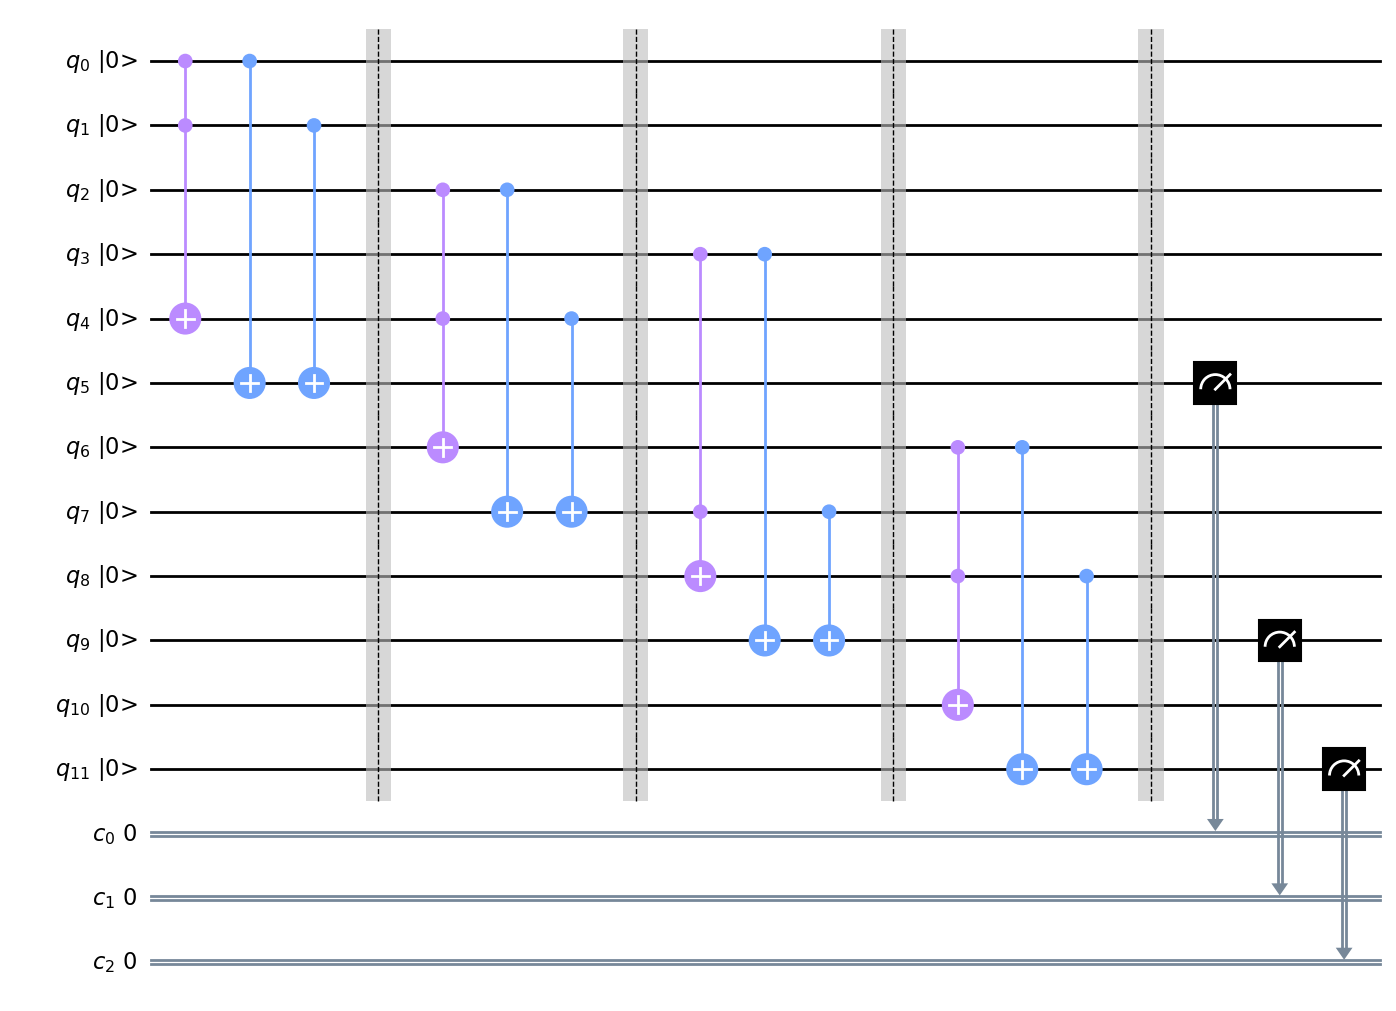

In [8]:
# Create a circuit with 12 quantum registers and 3 classical registers, q0 = a0, q1 = b0, q2 = a1 and q3 = b1
qc2 = QuantumCircuit(12, 3)

# Half Adder on a0, b0
qc2.ccx(0,1,4)
qc2.cx(0,5) 
qc2.cx(1,5) 
qc2.barrier()

# Half Adder on a1, carry from prev half adder
qc2.ccx(2,4,6)
qc2.cx(2,7) 
qc2.cx(4,7) 
qc2.barrier()

# Half Adder on b1, ans from prev half adder
qc2.ccx(3,7,8)
qc2.cx(3,9) 
qc2.cx(7,9) 
qc2.barrier()

# Half Adder on carry from prev 2 half adders
qc2.ccx(6,8,10)
qc2.cx(6,11) 
qc2.cx(8,11) 
qc2.barrier()

qc2.measure(5,0)
qc2.measure(9,1)
qc2.measure(11,2)
# Draw the circuit
qc2.draw(initial_state = True, cregbundle = False, output = 'mpl', style = "clifford")

/var/folders/jm/jj3jlz1j63v1qh6z_xp8840h0000gn/T/ipykernel_93043/3372332794.py:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc2, simulator, shots=1000)


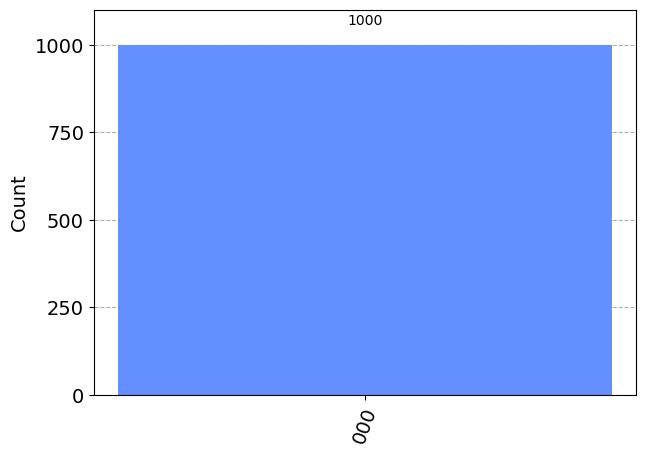

In [9]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc2, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc2)

# Plot the results
plot_histogram(counts)